In [1]:
# importing the libraries
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'after')

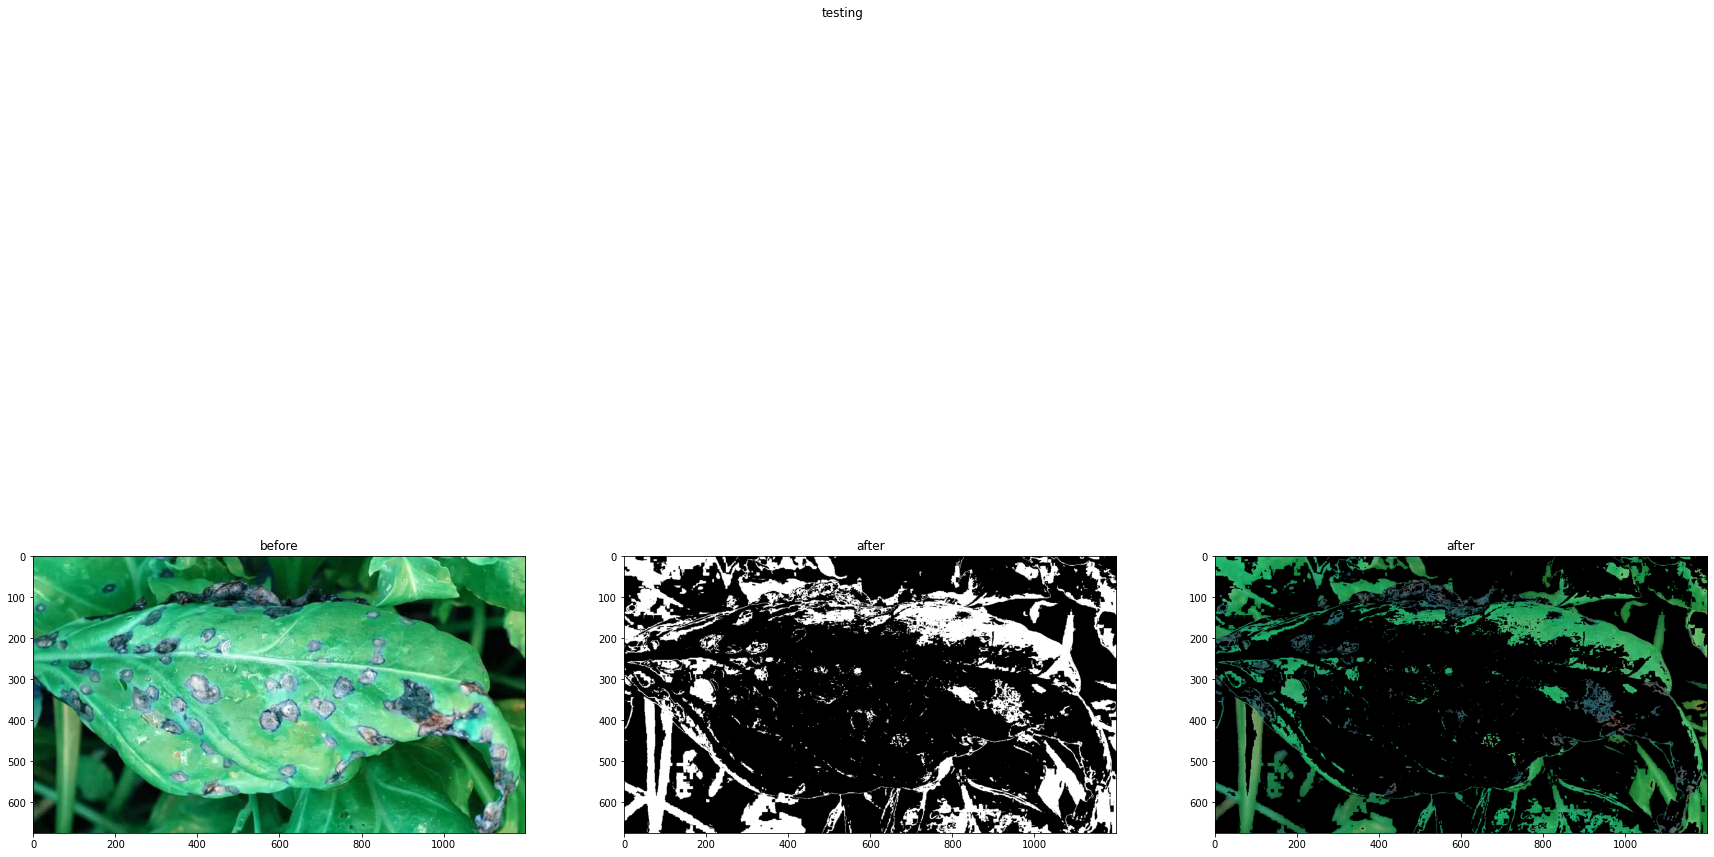

In [2]:
# RGB -> removing Green -> showing the image
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("testgreen.jpg")

## mask of red color
maskblue = cv2.inRange(img, (0, 0, 50), (50, 50,255))

## mask of blue color
mask1 = cv2.inRange(img, (49,108,49), (117, 255, 117))
mask2 = cv2.inRange(img, (20,47,40), (117, 255, 117))
mask3 = cv2.inRange(img, (0,128,0), (117, 255, 117))
mask4 = cv2.inRange(img, (34,139,34), (117, 255, 117))
mask5 = cv2.inRange(img, (20,47,40), (190, 255, 24))
mask6 = cv2.inRange(img, (36, 25, 25), (70, 255,255))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#edges = cv.Canny(img,100,200)
# cv2.imshow('mask red color',mask1)
# cv2.imshow('mask green color',mask2)
edges = cv2.Canny(mask3,100,200)
mask1= 255-mask1
res = cv2.bitwise_and(img, img, mask=mask2)
fig = plt.figure(figsize=(30,20))
fig.suptitle("testing")
fig.add_subplot(1, 3, 1)
# showing the image before range compression
plt.imshow(img)
plt.title("before")
# showing the image after range compression
fig.add_subplot(1, 3, 2)
plt.imshow(mask2, cmap="gray")
plt.title("after")
fig.add_subplot(1, 3, 3)
plt.imshow(res)
plt.title("after")
# fig.add_subplot(1, 6, 4)
# plt.imshow(maskblue)
# plt.title("after")
# cv2.waitKey(0)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def maskgreen(image):
    low_green_test = np.array([36, 50, 70])
    high_green_test = np.array([89, 255, 255])
    image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # create the Mask
    mask = cv2.inRange(imgHSV, low_green_test, high_green_test)
    return mask
# clustering function
def cluster_image(image):
    #image = cv2.imread("apple.JPG")
    # image reshaping to make it a 1 dimension array with 3 channels
    # resizing the image to save time
    dim = (128,128)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    image_flat = resized .reshape((-1,3))
    # now converting the datatype of the image to float32 to be compatiable with opencv k-means clustering
    image_flat = np.float32(image_flat)
    # setting a criteria for the k-means algorithm to know when to stop
    # max number of iterations and number and epslon is reached 10, 1.0
    criteria = (cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
    # number of clusters
    k = 6
    attempts = 10
    # doing the k-mean clustering on the image
    # center of each cluster and label for each pixel ret the distance between each pixel and its center
    # pp something called careful seeding
    ret, label, center = cv2.kmeans(image_flat,k, None, criteria, attempts,cv2.KMEANS_PP_CENTERS)
    # changing the center to unit so we can plot it
    center = np.uint8(center)
    # 
    result = center[label.flatten()]
    # reshaping the result
    result_image = result.reshape((128,128,3))
    return result_image
def grabcut_image(imageclusters, imagereal, getrect =False):
    # image here represent the image clustered
    #image = cv2.imread("segmentedimage.jpg")
    # i can use image resizing here later if i wanted to make sure that the image is in small shape
    # resizing the image to save time
    dim = (128,128)
    imagereal = cv2.resize(imagereal, dim, interpolation = cv2.INTER_AREA)
    # mask
    mask = np.zeros(imageclusters.shape[:2], np.uint8)
    # bgd and fgd models
    bgdmodel = np.zeros((1,65), np.float64)
    fgdmodel = np.zeros((1,65), np.float64)
    # in my case the rect would be all the image because it will be already been
    # maskgreeni = maskgreen(imagereal)
    # where = np.array(np.where(maskgreeni))
    # y1, x1 = np.amin(where, axis=1)
    # y2, x2 = np.amax(where, axis=1) + 1
    #rect = (y1+6, x1+6,y2, x2)
    if getrect == True:
        rect = get_rect(mask)
    else:
        rect = (0,0,120,120)
    print(rect)
    # doing the grap cut using opencv
    cv2.grabCut(imageclusters, mask,rect, bgdmodel, fgdmodel, 5, cv2.GC_INIT_WITH_RECT)
    print("grabcut")
    mask2 = np.where((mask==2)|(mask==0),0,1).astype("uint8")
    image_result = imagereal*mask2[:,:,np.newaxis]
    return image_result, mask2

def get_disease_mask(leafmask, greenmask):
    greenmask = greenmask
    diseasemask =  cv2.bitwise_and(greenmask,leafmask)
    return diseasemask
    

(0, 0, 120, 120)
grabcut
(128, 128, 3)
mask (128, 128)


True

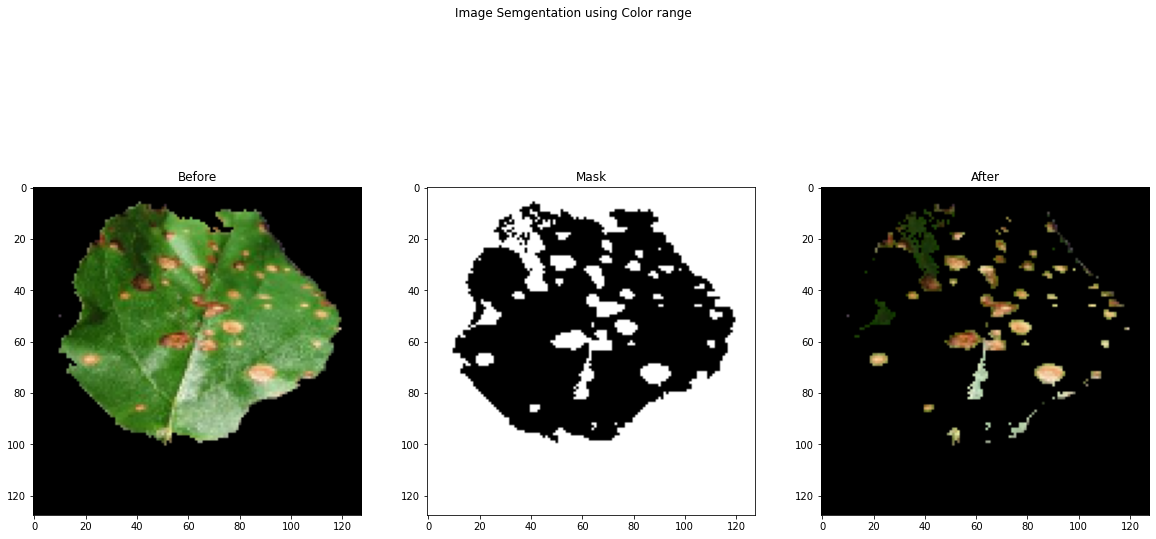

In [4]:
# hsv -> removing green -> showing the image
import cv2
import numpy as np
import matplotlib.pyplot as plt
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
low_green_test = np.array([36, 50, 70])
high_green_test = np.array([89, 255, 255])

image = cv2.imread('apple.jpg')
#image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
#removeblackimage = removeblack(image)
#imageclusters = cluster_image(removeblackimage)
imageclusters = cluster_image(image)
imagee,imagemask = grabcut_image(imageclusters,image, getrect=False)
# green [[89, 255, 255], [36, 50, 70]]
# convert BGR to HSV
image = cv2.resize(imagee, (128,128), interpolation = cv2.INTER_AREA)
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# create the Mask
mask = cv2.inRange(imgHSV, low_green_test, high_green_test)
# inverse mask
maskr = 255-mask
#maskr = get_disease_mask(imagemask,maskr)
#segmented_image = cv2.bitwise_and(image, image, mask=mask)
segmented_image = cv2.bitwise_and(image, image, mask=maskr)
print(segmented_image.shape)
print(f"mask {mask.shape}")
fig = plt.figure(figsize=(20,10))
fig.suptitle("Image Semgentation using Color range")
fig.add_subplot(1, 3, 1)
# showing the image before range compression
plt.imshow(image)
plt.title("Before")
# showing the image after range compression
fig.add_subplot(1, 3, 2)
plt.imshow(maskr, cmap="gray")
plt.title("Mask")
# fig.add_subplot(1, 4, 3)
# plt.imshow(get_disease_mask(imagemask,maskr), cmap="gray")
# plt.title("Mask")
fig.add_subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title("After")
cv2.imwrite( "test.jpg",segmented_image)

True

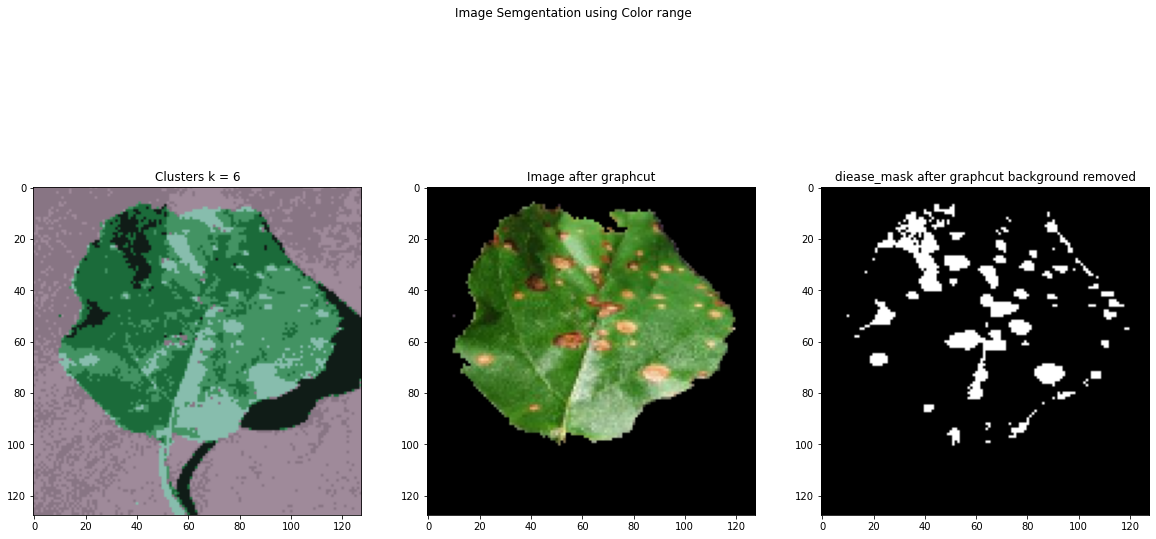

In [5]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Image Semgentation using Color range")
fig.add_subplot(1, 3, 1)
# showing the image before range compression
plt.imshow(imageclusters)
plt.title("Clusters k = 6")
# showing the image after range compression
fig.add_subplot(1, 3, 2)
plt.imshow(image, cmap="gray")
plt.title("Image after graphcut")
fig.add_subplot(1, 3, 3)
plt.imshow(get_disease_mask(imagemask,maskr), cmap="gray")
plt.title("diease_mask after graphcut background removed")
# fig.add_subplot(1, 3, 3)
# plt.imshow(segmented_image)
# plt.title("After")
cv2.imwrite( "test.jpg",segmented_image)

In [ ]:
# SLIC --> Grap cut # this will remove the background then i will use the HSV


12
15
15
12
[(120, 8), (98, 119), (6, 98), (8, 6)]
<class 'tuple'>
((120, 8), (98, 119), (6, 98), (8, 6))
120
98
6
8
(6, 6, 120, 120)


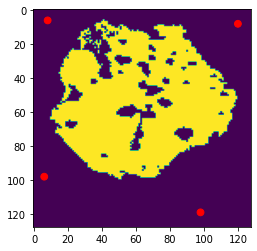

In [6]:
from matplotlib.patches import Arrow, Circle
def myrange(s, e=0):
    if s > e:
        return range(s,e,-1)
    elif s<0:
        return range(0,s,-1)
    else:
        return range(s, e)
def get_rect_from_range(rectlist):
    rectlistnew = []
    for rect in rectlist:
        print(rect[0])
        rectlistnew.append(rect[0])
    sortedlist = sorted(rectlistnew)
    sortedlist = [sortedlist[0],sortedlist[0],sortedlist[-1],sortedlist[-1]]
    return tuple(sortedlist)
def get_range(xrange_s, xrange_e, yrange_s, yrange_e,mask,direction, num=5):
    count = 0
    previousy = 0
    for x in myrange(xrange_s, xrange_e-abs(num)):
        for y in myrange(yrange_s,  yrange_e-abs(num)):
            if mask[x,y] == 255:
                #print("#",end="")
                #previouslist.append(1)
                count += 1
            else:
                #print("*",end="")
                count += 0
                #previouslist.append(0)
            previousy = y
        if count>=abs(num):
            print(count)
            #return (x,abs(previousy))
            if direction == 'x':
                return (abs(previousy), x)
            else:
                return (x,abs(previousy))
    print("=========================")
    return 0
# get rect funciton
def get_rect(image):
    low_green_test = np.array([36, 50, 70])
    high_green_test = np.array([89, 255, 255])
    #image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # create the Mask
    mask = cv2.inRange(imgHSV, low_green_test, high_green_test)
    # now i will convert the image into an array and loop over it is values
    # until i find 4 to 10 adjacent pixels that are in the leaf mask and mark the point
    #imagemask = np.zeros((128,128), dtype=np.uint8)
    rect = [] # rect list
    num = 7
    min = 0
    max = image.shape[0]
    value = get_range(min, max, min, max,mask,'x', num=num) # true mean move
    rect.append(value) # circle one 0,0 start position
    value = get_range(max-1,min , min, max-1,mask,'y', num=num)
    rect.append(value) # circle two 128,0 start position
    value = get_range(max-1, min , max-1, min,mask,'x',num=num)
    rect.append(value) # circle three 128,0 start position
    value = get_range(min, max-1 , max-1, min,mask,'y', num=num) 
    rect.append(value)# circle four 128, 128 start position
    # where = np.array(np.where(mask))
    # y1, x1 = np.amin(where, axis=1)
    # y2, x2 = np.amax(where, axis=1) + 1
    #rect = [(0,0),(127,0),(127,127),(0,127)]
    patches = [Circle(rect[0], radius=2, color='red'),Circle(rect[1], radius=2, color='red'),Circle(rect[2], radius=2, color='red'),Circle(rect[3], radius=2, color='red')]
    print(rect)
    rect = tuple(rect)
    #print(settest)
    print(type(rect))
    print(rect)
    fig, ax = plt.subplots(1)
    fig.figsize=(20,10)
    ax.imshow(mask)
    for p in patches:
        ax.add_patch(p)
    return get_rect_from_range(rect)
rect = get_rect(image) 
print(rect)

In [ ]:
# edge detection
#gray = img_gray
gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
# remove noise
img = cv2.GaussianBlur(gray,(9,9),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
cv2.imwrite("laplacian.JPG",sobelx)
plt.show()


NameError: name 'segmented_image' is not defined

In [5]:
from numpy import asarray
import numpy as np
from PIL import Image

def remove_black(image_array):
    image_shape = image_array.shape
    # taking the width and height of the image
    width = image_shape[1]
    height = image_shape[0]
    # converting the image to a vector to ease the computations
    # make a 1-dimensional view of arr
    # find the highest black value
    vector = image_array.ravel().copy()
    min = np.min(vector)
    average = np.average(vector)
    vector_real = image_array.ravel().copy()
    print(f"before the loop : {len(vector_real)}")
    for index, x in enumerate(vector_real):
        if x>min and x<26:
            vector[index] = average
        else:
            vector[index] = x
    # converting the vector back to the shape of the image
    image_array_after = np.asarray(vector).reshape(image_shape)
    return image_array_after
def removeblack(image):
    # remove black function
    image_array = asarray(image)
    # showing the shape of the image
    print(image_array.shape)
    # doing the clipping filter on the image array
    image_array_after = remove_black(image_array)
    # converting the image back from the array
    image_after = Image.fromarray(image_array_after)
    image_after.save("loadingremoveblack.JPG")
    image_after = cv2.imread("loadingremoveblack.JPG")
    return image_after

grabcut


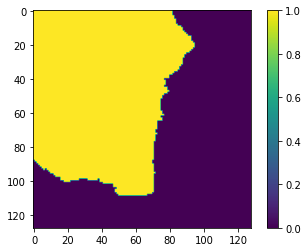

In [11]:
# grapcut algorithm implementation using opencv
import numpy as np
import matplotlib.pyplot as plt
import cv2
# first reading the image
image = cv2.imread("potato_removeblack_median.JPG")
#image = result_image
# i can use image resizing here later if i wanted to make sure that the image is in small shape
# resizing the image to save time
dim = (128,128)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
# mask
mask = np.zeros(image.shape[:2], np.uint8)
# bgd and fgd models
bgdmodel = np.zeros((1,65), np.float64)
fgdmodel = np.zeros((1,65), np.float64)
# in my case the rect would be all the image because it will be already been
rect = (0,0,120,120)
# doing the grap cut using opencv
cv2.grabCut(image, mask,rect, bgdmodel, fgdmodel, 5, cv2.GC_INIT_WITH_RECT)
print("grabcut")
mask2 = np.where((mask==2)|(mask==0),0,1).astype("uint8")
#image_result = image*mask2[:,:,np.newaxis]
plt.imshow(mask2)
plt.colorbar()
plt.show()




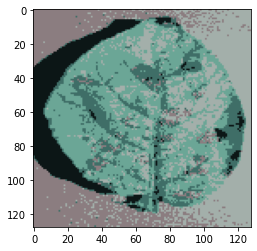

In [12]:
# clustering image pixels
# first importing the libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# reading the target image
image = cv2.imread("potato.JPG")
# image reshaping to make it a 1 dimension array with 3 channels
# resizing the image to save time
dim = (128,128)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
image_flat = resized .reshape((-1,3))
# now converting the datatype of the image to float32 to be compatiable with opencv k-means clustering
image_flat = np.float32(image_flat)
# setting a criteria for the k-means algorithm to know when to stop
# max number of iterations and number and epslon is reached 10, 1.0
criteria = (cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
# number of clusters
k = 5
attempts = 10
# doing the k-mean clustering on the image
# center of each cluster and label for each pixel ret the distance between each pixel and its center
# pp something called careful seeding
ret, label, center = cv2.kmeans(image_flat,k, None, criteria, attempts,cv2.KMEANS_PP_CENTERS)
# changing the center to unit so we can plot it
center = np.uint8(center)
# 
result = center[label.flatten()]
# reshaping the result
result_image = result.reshape((128,128,3))

cv2.imwrite("segmentedimage.jpg", result_image)
plt.imshow(result_image)

